<a href="https://colab.research.google.com/github/franceslawley/Python_Skills/blob/main/4_Data_Visualizations_with_Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


The datasets used in this homework can be found in the google drive link below - 

https://drive.google.com/drive/folders/1NxCh4X7u7wVo5aHojxjLNs9wC7B7zJhb?usp=sharing

Import all the libraries you require in the cell below.

In [ ]:
# import all necessary libraries here

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1. Create a statistical summary of the data in the file “CommuteStLouis.csv”. Plot a histogram of age for the CommuteStLouis data.

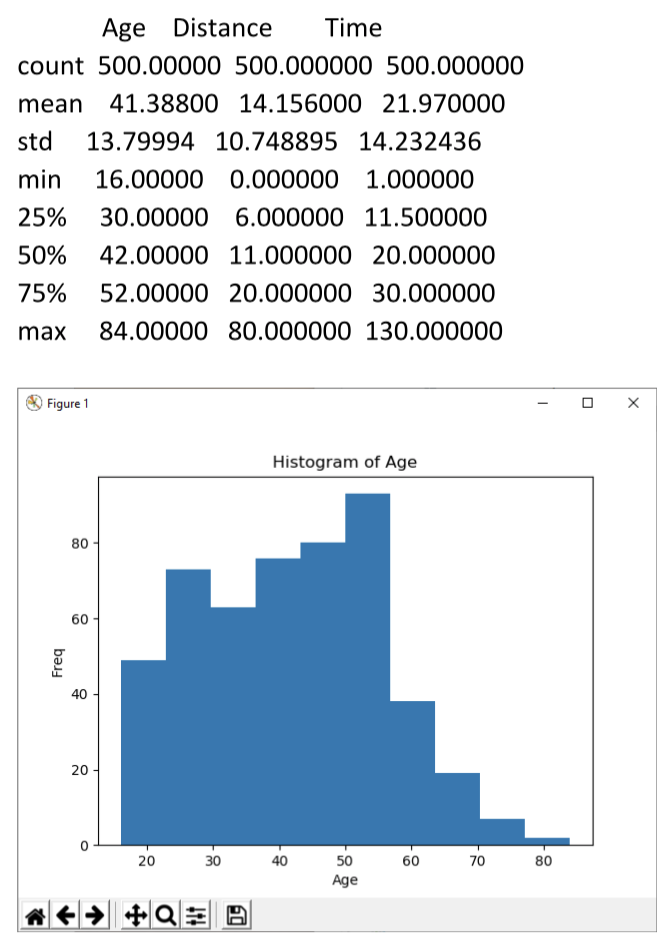

             Age    Distance        Time
count  500.00000  500.000000  500.000000
mean    41.38800   14.156000   21.970000
std     13.79994   10.748895   14.232436
min     16.00000    0.000000    1.000000
25%     30.00000    6.000000   11.500000
50%     42.00000   11.000000   20.000000
75%     52.00000   20.000000   30.000000
max     84.00000   80.000000  130.000000


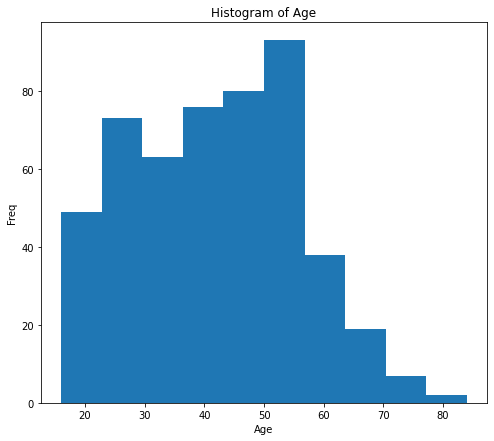

In [ ]:
#1

df = pd.read_csv('CommuteStLouis.csv')
print(df.describe())

plt.figure(figsize=(8,7))
plt.hist(df['Age'])
plt.title("Histogram of Age")
plt.xlabel("Age")
plt.ylabel("Freq")

plt.show()

### 2. For the data CommuteStLouis:

a. Produce a correlation matrix of age, distance and time. Which two numeric variables are most highly correlated? What is the correlation coefficient for the above pair? Hint: If df is your dataframe then you can use print(df.corr()).

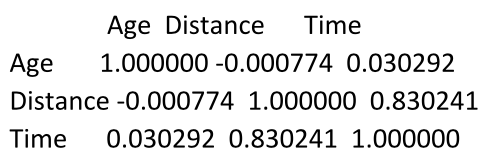

b. Create a scatterplot matrix of the numeric variables in the data. What do the figures in the diagonal going from the top left to the bottom right show? What can you say about the skewness of the various attributes?

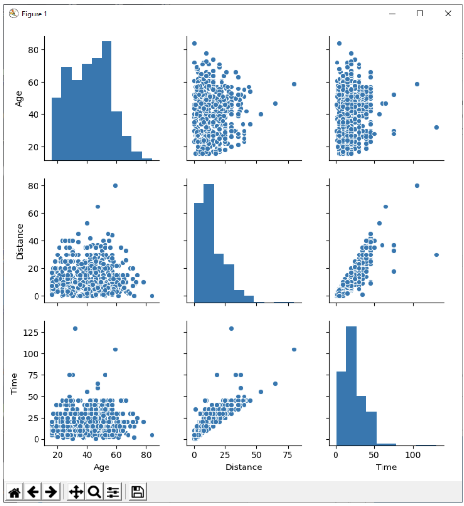

c. Produce a side-by-side boxplot of distance travelled by gender. Do the data in the file indicate that women tend to commute shorter distances?

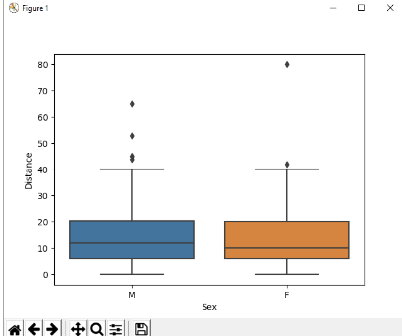

In [ ]:
#2a

df.corr('pearson')
#Distance and Time are the most highly correlated (0.83 Correlation Coefficient which is the close to 1)

,Age,Distance,Time
Age,1.000000,-0.000774,0.030292
Distance,-0.000774,1.000000,0.830241
Time,0.030292,0.830241,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0a3a1f2950>,
      dtype=object)

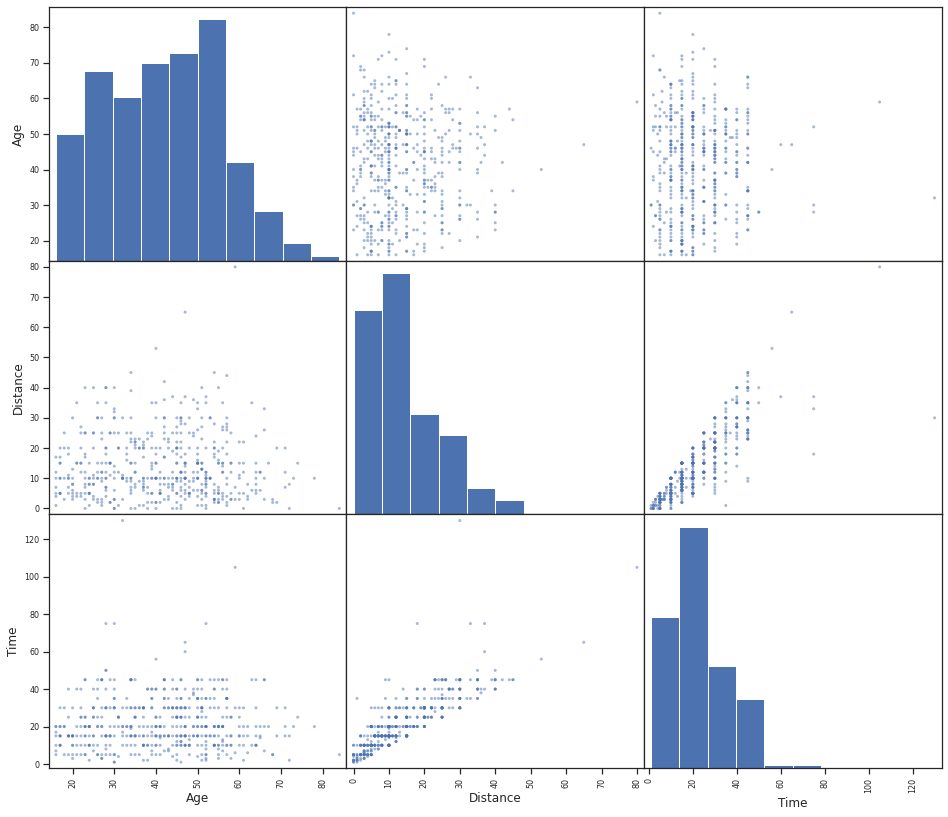

In [ ]:
#2b

import seaborn as sns
sns.set_theme(style="ticks")
pd.plotting.scatter_matrix(df, figsize = (16,14))

#Distance and Time are right skewed, indicating that their means typically fall above the median values of their data
#Age appears as a normal distribution with a slight right skew
#Distance, Time, and Age all appear to be positively skewed

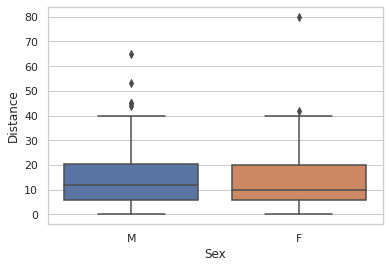

14.496153846153845
13.7875
10.862957523338022
10.634309851847684
65
80


In [ ]:
#2C

import seaborn as sb
sb.set_style('whitegrid')
sb.boxplot(x = 'Sex', y = 'Distance', data = df)
plt.show()

print(df[df['Sex']=='M']['Distance'].mean())
print(df[df['Sex']=='F']['Distance'].mean())

print(df[df['Sex']=='M']['Distance'].std())
print(df[df['Sex']=='F']['Distance'].std())

print(df[df['Sex']=='M']['Distance'].max())
print(df[df['Sex']=='F']['Distance'].max())

#Males and Females commute roughly the same average distances (13.8 for female, 14.5 for male)
#Males and Females also display a very similar standard deviation (10.1 for both)
#From the boxplot, we can see that on average, both men and women commute the same distances
#The only discrepancy in commute distances is that females have an outlier that equals a max distance of 80 while males have only reached a max distance of 65

### 3. For the pair in Question 2.a plot the scatter plot. Also superimpose a linear regression line on the plot.

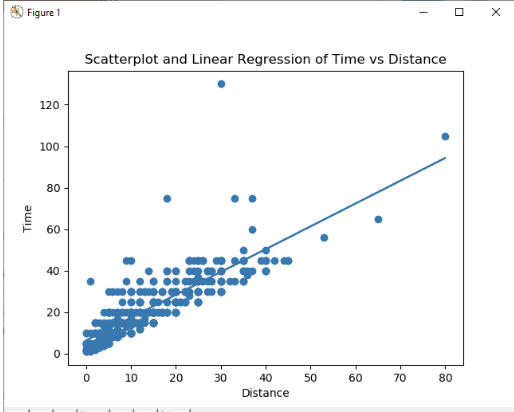

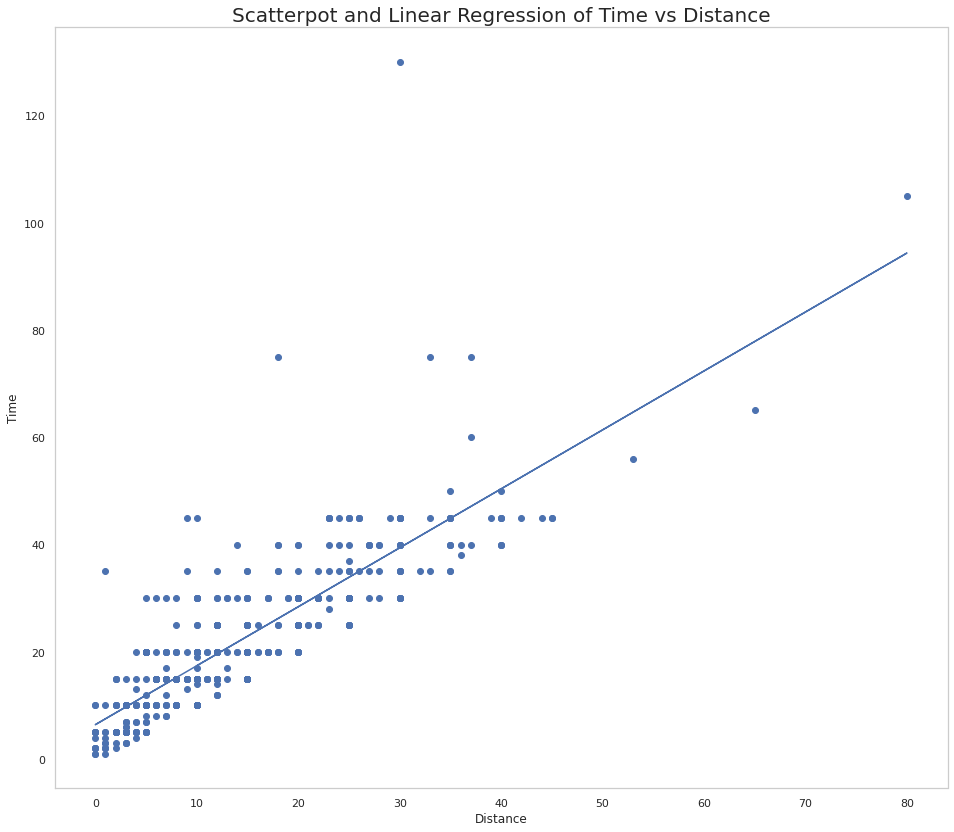

In [ ]:
#3

#Distance and Time Scatter plot
plt.figure(figsize=(16,14))
plt.scatter(df.Distance, df.Time)
plt.grid(False)
plt.title("Scatterpot and Linear Regression of Time vs Distance", size = 20)
plt.xlabel("Distance")
plt.ylabel("Time")

#Add line of best fit
m, b = np.polyfit(df.Distance, df.Time, 1)
plt.plot(df.Distance, m*df.Distance + b, color = 'b')  
plt.show()

### 4. Show the distribution of residuals of the data from Part 3.

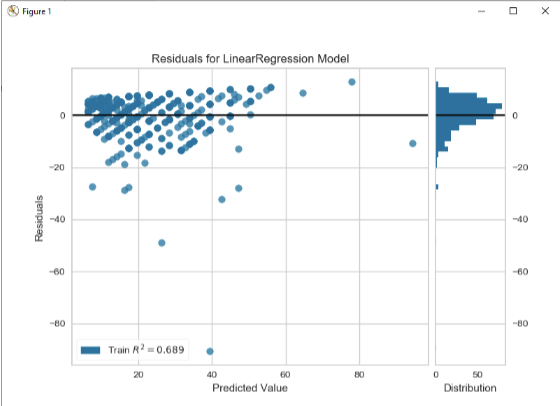

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.


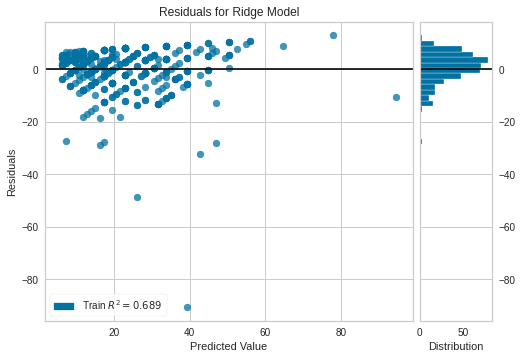

In [ ]:
#4
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from yellowbrick.regressor import ResidualsPlot

x = df.Distance
y = df.Time
X = x[:, np.newaxis]
#X = x.values.reshape(-1,1)

ridge = Ridge()
visualizer = ResidualsPlot(ridge)
visualizer.fit(X,y)
visualizer.poof();